In [ ]:
import numpy as np #cálculos de matemática
import matplotlib.pyplot as plt #plotar os gráficos
import matplotlib.lines as mlines #plotar os markers nos gráficos
import pandas as pd #data frames
import os #comandos ! do bash
import glob #faz as listas

#as bibliotecas torch 
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
from PIL import Image

from torchvision import models

from torch import optim

from torch.optim.lr_scheduler import OneCycleLR

import copy



covid_list = glob.glob('./PNGS/PNGs/*')
pneumo_list = glob.glob('./Pneumonia/*')
mass_list = glob.glob('./Mass/*')
consolidation_list = glob.glob('./Consolidation/*')
edema_list = glob.glob('./Edema/*')
fibrosis_list = glob.glob('./Fibrosis/*')

In [ ]:
numepoca=65
balum = 'unbal'

selectedname = 'pneumo'
selected = pneumo_list
#menorlista = min([len(covid_list),len(selected)])
#covid_list = covid_list[:menorlista]
#selected = selected[:menorlista]
selected_label = torch.zeros(len(selected))#[:len(selected)]

<>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-3-996ea14aaa43>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if x.mode is not 'RGB':


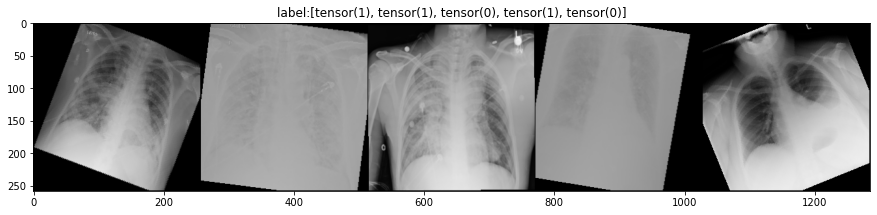

In [ ]:
class my_Dataset(Dataset):
    def __init__(self, transform=None):
        covid_list = glob.glob('./PNGS/PNGs/*')#[:len(selected)]
        covid_label = torch.ones(len(covid_list))#[:len(selected)]
        
        pneumo_list = glob.glob('./Pneumonia/*')#[:len(selected)]
        pneumo_label = torch.zeros(len(pneumo_list))#[:len(selected)]
        
        mass_list = glob.glob('./Mass/*')#[:len(selected)]
        mass_label = torch.zeros(len(mass_list))#[:len(selected)]
        
        consolidation_list = glob.glob('./Consolidation/*')#[:len(selected)]
        consolidation_label = torch.zeros(len(consolidation_list))#[:len(selected)]

        edema_list = glob.glob('./Edema/*')#[:len(selected)]
        edema_label = torch.zeros(len(edema_list))#[:len(selected)]
        
        fibrosis_list = glob.glob('./Fibrosis/*')#[:len(selected)]
        fibrosis_label = torch.zeros(len(fibrosis_list))#[:len(selected)]

# Para fazer o balancemento de classes optamos por usar o menor valor entre os possíveis candidatos        
#        self.images = covid_list[:len(pneumo_list)] + pneumo_list[:len(pneumo_list)] + mass_list[:len(pneumo_list)] + consolidation_list[:len(pneumo_list)] + edema_list[:len(pneumo_list)] + fibrosis_list[:len(pneumo_list)]
#        self.labels = torch.cat([covid_label[:len(pneumo_list)], pneumo_label[:len(pneumo_list)], mass_label[:len(pneumo_list)], consolidation_label[:len(pneumo_list)], edema_label[:len(pneumo_list)], fibrosis_label[:len(pneumo_list)]])
        #, mass_label, consolidation_label, edema_label, fibrosis_label])

# Para fazer com as classes desblanceadas usamos todas as imagens        
#        self.images = covid_list + pneumo_list + mass_list + consolidation_list + edema_list + fibrosis_list
#        self.labels = torch.cat([covid_label, pneumo_label, mass_label, consolidation_label, edema_label, fibrosis_label])
        #, mass_label, consolidation_label, edema_label, fibrosis_label])   

# Para fazer com as classes uma a uma comparadas     
        self.images = covid_list + selected
        self.labels = torch.cat([covid_label, selected_label])
        #, mass_label, consolidation_label, edema_label, fibrosis_label])   
        
        self.trfm = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        x = Image.open(self.images[index])
        if x.mode is not 'RGB':
            x = x.convert('RGB')
        if self.trfm is not None:
            x = self.trfm(x)
        else:
            x = transforms.ToTensor()(x)
        y = self.labels[index].long()
        return x, y

trans = transforms.Compose([
                            transforms.Resize((256,256)),
                            transforms.RandomRotation(30),
                            #transforms.RandomHorizontalFlip(p=0.1),
                            transforms.ToTensor()
])

data = my_Dataset(trans)

len_ds = len(data)
len_train = int(0.8*len_ds)
len_val = len_ds - len_train

ds_train, ds_val = random_split(data, [len_train, len_val])

train_dl = DataLoader(dataset=ds_train, batch_size=32, shuffle=True, num_workers=6, pin_memory=True)
val_dl = DataLoader(dataset=ds_val, batch_size=32, shuffle=False, num_workers=6, pin_memory=True)

def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)
    if y is not None:
        plt.title(f'label:{y}')

        
grid_size = 5
rnd_inds = np.random.randint(0,len(ds_train),grid_size)

x_grid = [ds_train[i][0] for i in rnd_inds]
y_grid = [ds_train[i][1] for i in rnd_inds]


x_grid = make_grid(x_grid, nrow=grid_size, padding=1)


plt.figure(figsize=(15,15))
show(x_grid,y_grid)

In [ ]:
'''trans = transforms.Compose([
                            transforms.Resize((256,256)),
                            transforms.ColorJitter(brightness=(0.6,1.4),contrast=(0.6,1.4)),
                            transforms.RandomRotation(30),
                            transforms.ToTensor()
])

data = my_Dataset(trans)

len_ds = len(data)
len_train = int(0.8*len_ds)
len_val = len_ds - len_train

ds_train, ds_val = random_split(data, [len_train, len_val])

train_dl = DataLoader(dataset=ds_train, batch_size=32, shuffle=True, num_workers=6, pin_memory=True)
val_dl = DataLoader(dataset=ds_val, batch_size=32, shuffle=False, num_workers=6, pin_memory=True)        
        
        
grid_size = 2
rnd_inds = np.random.randint(0,len(ds_train),grid_size)

x_grid = [ds_train[i][0] for i in rnd_inds]
y_grid = [ds_train[i][1] for i in rnd_inds]


x_grid = make_grid(x_grid, nrow=grid_size, padding=1)


plt.figure(figsize=(15,15))
show(x_grid,y_grid);

In [ ]:
model_resnet18 = models.resnet18(pretrained=True,num_classes=2)

num_classes = 2
num_ftrs = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(num_ftrs, num_classes)

bt = next(iter(train_dl))

outtt = model_resnet18(bt[0])

opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)

lr_scheduler = OneCycleLR(opt,max_lr=10, pct_start=0.2, steps_per_epoch=1, epochs=numepoca)

def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
    
def metrics_batch(ouput, target):
    pred = ouput.argmax(dim=1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

los_func = nn.CrossEntropyLoss(reduction='sum')

#helper function to compute the loss value per batch of data
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metrics_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    return loss.item(), metrics_b

def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metrics = 0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb
        yb = yb
        #xb = xb.to('cuda')
        #yb = yb.to('cuda')
        output = model(xb)
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        if metric_b is not None:
            running_metrics += metric_b
        if sanity_check is True:
            break
            
    loss = running_loss/float(len_data)
    metric = running_metrics/float(len_data)
    
    return loss, metric

def train_val(model, params):
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params['optimizer']
    train_dl = params['train_dl']
    val_dl = params['val_dl']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    path2weights = params['path2weights']
    
    loss_history = {
        'train':[],
        'val':[]
    }
    metric_history = {
        'train':[],
        'val':[]
    }
    best_model_weights = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f'epoch {epoch}/{num_epochs}, current lr:{current_lr}')
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
            loss_history['val'].append(val_loss)
            metric_history['val'].append(val_metric)
            
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_weights = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print('best model saved')
        
        lr_scheduler.step()
        print(f'train loss: {train_loss:.6f}, val loss:{val_loss:.6f}, accuracy: {100*val_metric:.2f}')
        print('+-+-'*10)
        
    model.load_state_dict(best_model_weights)
    return model, loss_history, metric_history

def find_lr(model, loss_fn, optimizer, init_value=1e-8, final_value=10.):
    nunber_in_epoch = len(train_dl) -1
    update_step = (final_value/init_value)**(1/nunber_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    for data in train_dl:
        batch_num += 1
        inputs, labels = data
        inputs = inputs
        #inputs = inputs.to('cuda')
        labels = labels
        #labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        
        if batch_num > 1 and loss > 4*best_loss:
            return log_lrs, losses
        
        if loss < best_loss or batch_num == 1:
            best_loss = loss
        
        losses.append(loss)
        log_lrs.append(lr)
        
        loss.backward()
        optimizer.step()
        
        lr *= update_step
        optimizer.param_groups[0]["lr"] = lr
    return log_lrs, losses

def smooth(y, window_size, order, deriv=0, rate=1):
    from math import factorial
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except(ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')


/home/bruno/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
logs, losses = find_lr(model_resnet18, los_func, opt)

In [ ]:
losses_y = np.array([x.detach().cpu().numpy() for x in losses])

losses_y = smooth(losses_y, 21, 1)

min_grad = np.gradient(losses_y).argmin()

logs[min_grad]

fig, ax = plt.subplots(figsize=(12,8))
ax.axvline(x=logs[min_grad], c='r',ls='--')
ax.annotate(f'lr={logs[min_grad]:.3e}', xy=(logs[min_grad], losses_y[min_grad]),
             xytext=(0.7, 0.9), textcoords='axes fraction', fontsize=20)
ax.plot(logs, losses_y, lw=3.)
plt.ylabel('Loss value', fontsize=26)
plt.xlabel('Learning rate', fontsize=26)
plt.xscale('log')
plt.grid()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)  
plt.savefig(f'lr {balum} covid and {selectedname} {numepoca} epochs.png', format='png');
plt.show()

In [ ]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model_resnet18.parameters(), lr=logs[min_grad])

lr_scheduler = OneCycleLR(opt,max_lr=10,pct_start=0.1, steps_per_epoch=len(train_dl), epochs=numepoca)

params_train = {
    'num_epochs':numepoca,
    'loss_func':loss_func,
    'optimizer':opt,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'models/resnet18.pt'
}

In [ ]:
model_resnet18, loss_history, metrics_history = train_val(model_resnet18, params_train)

In [ ]:
num_epochs = params_train['num_epochs']
melhor_epoch = loss_history['val'].index(min(loss_history['val']))
melhor_acc = metrics_history['val'][melhor_epoch]

fig, ax = plt.subplots(figsize=(12,8))
twin1 = ax.twinx()
plt.title('Loss/Accuracy', fontsize=26)
ax.plot(range(1,num_epochs+1), loss_history['train'],ls='-', 
        label='ResNet18-train loss', lw=3., color='seagreen',alpha=0.5)
ax.plot(range(1,num_epochs+1), loss_history['val'],ls='-', 
        label='ResNet18-val loss', lw=3., color='brown',alpha=0.5)
twin1.plot(range(1,num_epochs+1), metrics_history['train'],ls='-.', lw=2.5, 
           label='ResNet18-train acc', color='cadetblue')
twin1.plot(range(1,num_epochs+1), metrics_history['val'],ls='-.', lw=2.5, 
           label='ResNet18-val acc', color='firebrick')


#inserir os parâmetros do plot da legenda
x_b,y_b = 0.65, 0.4


bestmark = mlines.Line2D([], [], color='gold', marker='*', linestyle='None', markersize=15, label='Best Epoch')
plt.plot([melhor_epoch+1],metrics_history['val'][melhor_epoch], "*", color='gold', markersize='15')
beststar = plt.legend(bbox_to_anchor=(x_b+0.25, y_b),handles=[bestmark],fontsize=16)
ax.annotate(f'learning rate = {logs[min_grad]:.3e}\nbest epoch / total = {melhor_epoch+1} / {num_epochs}\n with accuracy = {melhor_acc*100:.2f}%', xy=(logs[min_grad], losses_y[min_grad]),
             xytext=(x_b,y_b), textcoords='axes fraction', fontsize=12, color='grey')


x_a,y_a = x_b-0.05,y_b-0.36


ax.set_ylabel('Loss (NLLLoss)', fontsize=26)
twin1.set_ylabel("Accuracy", fontsize=26)
ax.set_xlabel('Training Epochs', fontsize=26)
ax.legend(bbox_to_anchor=(x_a,y_a), loc='lower left',fontsize=16,framealpha=0.5)
twin1.legend(bbox_to_anchor=(x_a, y_b-0.09), loc='upper left',fontsize=16, framealpha=0.5)
ax.grid()
plt.gca().add_artist(beststar)





for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tt1 in ax.yaxis.get_major_ticks():
    tt1.label.set_fontsize(20)

plt.savefig(f'{balum} covid and {selectedname} {num_epochs} epochs.png', format='png');
plt.show()